<a href="https://colab.research.google.com/github/raciel88p/learning-pandas/blob/main/rutina_de_como_analizar_datos_con_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#buscar la ruta de bases de datos de cambio climatico

In [3]:
!pip  install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#ingresando a google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
#incregasando a la ruta del archivo
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
 API_19_DS2_en_csv_v2_3470836.csv
 API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv
 API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv
 API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3605664.csv
 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv
 API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv
'Copia de 4 datatypes.ipynb'
 covid_19_data.csv
'Funciones matemátcas.ipynb'
 GlobalLandTemperaturesByCity.csv
 GlobalLandTemperaturesByCountry.csv
 GlobalLandTemperaturesByMajorCity.csv
 GlobalLandTemperaturesByState.csv
 GlobalTemperatures.csv
 london_merged.csv
 london_merged.gsheet
 Metadata_Country_API_19_DS2_en_csv_v2_3470836.csv
 Metadata_Country_API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv
 Metadata_Country_API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv
 Metadata_Country_API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3605664.csv
 Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv
 Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv
 Metadata_Indicator_API_19_DS2_en_csv_v

In [6]:
import pandas as pd
pd.__version__

'1.3.5'

In [7]:
#guardamos el archivo en una variable
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv') #poner nombre del archivo
df_temp.sample(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
26970,1980-09-01,12.527,0.144,Argentina
440291,1913-09-01,27.251,0.354,Saint Lucia
476987,1832-08-01,20.042,2.449,Slovenia
549760,1857-01-01,2.449,1.160,United Kingdom (Europe)
572216,1904-02-01,21.527,0.749,Yemen
229418,1981-10-01,26.765,0.538,Guyana
528173,2005-02-01,26.737,0.213,Tonga
147075,1865-05-01,26.664,1.331,Dominica
89538,1881-12-01,19.060,0.977,Burundi
78949,1985-04-01,25.030,0.336,Brazil


In [8]:
#para visualizar la lista de columnas que tiene la base de datos
list(df_temp)

['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']

In [9]:
#para saber el tamaño de la base de datos
df_temp.shape

(577462, 4)

In [10]:
#para ver como esta compuesta nuestra base de datos
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [11]:
#que paises unicos tenemos en la base de datos
df_temp['Country'].unique

<bound method Series.unique of 0            Åland
1            Åland
2            Åland
3            Åland
4            Åland
            ...   
577457    Zimbabwe
577458    Zimbabwe
577459    Zimbabwe
577460    Zimbabwe
577461    Zimbabwe
Name: Country, Length: 577462, dtype: object>

In [12]:
# vamos a convertir dt en una variable tipo tiempo
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year'] 

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [13]:
#vamos a crear un filtro para 1970
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [14]:
import numpy as np

In [15]:
#vamos agrupar por fecha y por pais encontrar un variante anual por temperatura
df_t_avr = df_temp.groupby( [ 'Country', pd.Grouper( key='year', freq= '1Y' ) ] ).agg( { 'AverageTemperature': [ np.mean, np.median ] } ) 
df_t_avr

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

In [16]:
#buscamos un pais en particular, xs permite selecionar un pais en nuestro indice
df_t_avr.xs('Costa Rica')['AverageTemperature']

,mean,median
year,,
1970-12-31,25.547818,25.4990
1971-12-31,25.431333,25.4285
1972-12-31,26.051583,26.1200
1973-12-31,25.951333,25.8580
1974-12-31,25.493667,25.4640
1975-12-31,25.480583,25.2830
1976-12-31,25.779250,25.9460
1977-12-31,26.115000,26.0240
1978-12-31,25.899250,25.7565


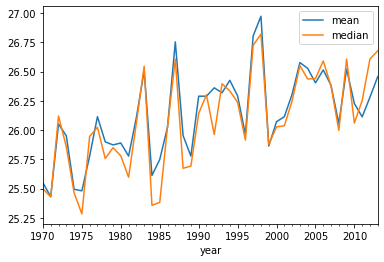

In [17]:
#vamos a visualizar la tabla anterior
df_t_avr.xs('Costa Rica')['AverageTemperature'].plot()

In [18]:
#vamos a trabajar con la mediana mas compata para jugar con las variables
df__T_temp = df_t_avr['AverageTemperature'][ ['median'] ].reset_index()
df__T_temp

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [19]:
#creamos la nueva colummna del a;o  y vamos solo a extraer el a;o
df__T_temp['date'] = df__T_temp['year'].dt.year
df__T_temp['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

In [20]:
#vamos a renombrar la tabla de la columna media a temperatura
df__T_temp.rename(columns={'median': 'temperature'}, inplace = True )
df__T_temp

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [21]:
#herramienta para encontrar la distribucion de las variables
df_t_pivot = df__T_temp.pivot_table(values = 'temperature', index='date', columns='Country')
df_t_pivot
# nos brinda una tabla con una estructura deferente

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,...,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,...,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,...,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,...,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,...,17.4025,13.2105,25.0760,24.3700,26.1720,21.5755,26.6320,21.6005,21.3255,5.4550
1975,13.5130,24.8045,12.3595,23.0740,26.6510,10.4105,22.4210,26.4780,26.3340,15.1515,...,17.1810,13.3395,24.9790,24.9900,26.2985,20.5175,26.1155,21.8635,21.7910,6.0170
1976,14.1615,24.8225,12.6080,22.2980,26.6155,9.6625,22.1455,26.9825,26.8425,14.3965,...,16.5660,11.3820,25.0590,24.4665,26.6620,20.4625,26.3220,21.6980,21.9880,4.3855
1977,15.6575,25.0345,11.9870,23.5375,26.7085,10.4055,22.6000,27.2010,27.0085,15.9725,...,18.3455,13.8000,25.6165,24.6295,26.8935,22.6755,26.8845,22.1670,22.2910,5.4745
1978,15.2580,24.9135,11.5490,22.5620,26.7250,9.7565,22.7055,27.2320,27.0370,15.3350,...,17.1655,13.2965,25.5600,24.4290,26.9675,21.7730,27.0135,22.1010,22.6210,5.7475


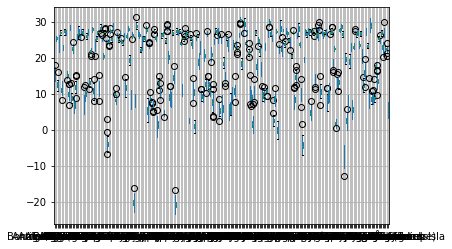

In [22]:
df_t_pivot.boxplot()
#muetra los valores a tipicos de la tabla pero como son mucho no se puede interpretar la tabla

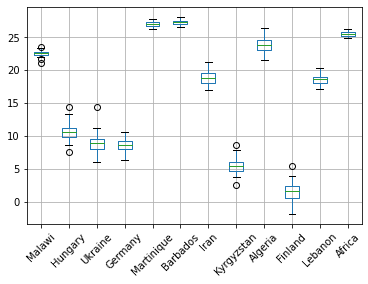

In [23]:
#para eso hacemos la tabla mas peque;a la T significa transpose
df_t_pivot.T.sample(12).T.boxplot(rot=45)

Preprocesamiento de datos: terminando de preparar y limpiar los datasets

In [24]:
#mesclando distintos data sets
!ls

 API_19_DS2_en_csv_v2_3470836.csv
 API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv
 API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv
 API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3605664.csv
 API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv
 API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv
'Copia de 4 datatypes.ipynb'
 covid_19_data.csv
'Funciones matemátcas.ipynb'
 GlobalLandTemperaturesByCity.csv
 GlobalLandTemperaturesByCountry.csv
 GlobalLandTemperaturesByMajorCity.csv
 GlobalLandTemperaturesByState.csv
 GlobalTemperatures.csv
 london_merged.csv
 london_merged.gsheet
 Metadata_Country_API_19_DS2_en_csv_v2_3470836.csv
 Metadata_Country_API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv
 Metadata_Country_API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv
 Metadata_Country_API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3605664.csv
 Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv
 Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv
 Metadata_Indicator_API_19_DS2_en_csv_v2_3470836.csv
 Metadata_Indicator_API_AG.LN

In [25]:
df_agri = pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_3472200.csv',header=2)
df_fore = pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_3470755.csv',header=2)
df_elec = pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3605664.csv',header=2)
df_co2e = pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv',header=2)
df_popu = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_3603750.csv',header=2)

In [26]:
#visualisando el data frame
df_popu


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN


In [27]:
#hay que darles formato para poder encajar y unificar con otros data sets
#dandole formato a los distintos data frame para unirlos en un solo
range(1971, 2015) #esto es una variable numerica
#lo vamos a convertir en un string
map(str, range(1971, 2015))
#esto nos genera una lista de elementos de a;os
#selecionamos las columnas que estamos interesado en trabajar 
colum = ['Country Name', 'Country Code'] + list(map(str, range(1971, 2015)))
#vamos a mostrar las 5 primeras columnas para ver como estamos trabajando
colum[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [28]:
#para eliminar informacion que no es perninente en el data frame
df_agri.loc[:,colum]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.00,20.00,20.00,20.00,20.00,20.0,20.00,20.00,20.00,20.00
1,Africa Eastern and Southern,AFE,5360170.0,5365870.0,5366130.0,5367810.0,5371960.0,5374560.0,5374970.0,5385870.0,...,5294720.25,5309259.72,5324692.99,5356256.56,5380079.83,5398501.8,6392500.50,6459157.24,6477782.40,6497055.30
2,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,...,379100.00,379100.00,379100.00,379100.00,379100.00,379110.0,379100.00,379100.00,379100.00,379100.00
3,Africa Western and Central,AFW,3102665.6,3060380.0,3111330.0,3064870.0,3060690.0,3066700.0,3023890.0,3013030.0,...,3480862.45,3481821.00,3497969.35,3524364.40,3536365.75,3551895.8,3559485.78,3574436.40,3594810.30,3597067.70
4,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,...,497366.95,502917.56,508468.17,514018.78,519569.39,525120.0,530670.62,536221.24,541771.86,547322.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5700.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,...,235230.00,236270.00,236270.00,235170.00,234520.00,235790.0,234520.00,235010.00,234990.00,234516.00
263,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,...,974830.00,968880.00,968900.00,971080.00,969880.00,968910.0,963740.00,963410.00,963410.00,963410.00
264,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,...,227620.00,230480.00,229840.00,230870.00,235860.00,234360.0,236360.00,238360.00,237360.00,238360.00


In [29]:
#cargando la lista de elementos
#list(map(str, range(1971, 2015)))
df_agri.loc[:,colum].melt(id_vars= ['Country Name', 'Country Code'])
#la funcion mealt hace que el rango de a;os sea parte de la columnas

,Country Name,Country Code,variable,value
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


In [30]:
#vamos a renombrar las variables de ano para que se puedan usar mejor
df_agri.loc[:,colum].melt(id_vars= ['Country Name', 'Country Code']).rename(
    columns={ 'variable' : 'date',
             'Country Name': 'Country',
             'Country Code': 'name',
             'value': 'agriculture'
} )

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


In [31]:
#hay que repetir lo anterior con todos los demas tablas y la mejor forma de hacerlo es con una funcion
def fun_formato(df, col = "agriculture"):
  return df.loc[:,colum].melt(id_vars= ['Country Name', 'Country Code']).rename(
      columns={ 'variable' : 'date',
              'Country Name': 'Country',
              'Country Code': 'name',
              'value': col
  } )


In [32]:
df_agri = fun_formato(df_agri, col= "agriculture")
df_fore = fun_formato(df_fore, col= "forest")
df_elec = fun_formato(df_elec, col= "electricprod")
df_co2e = fun_formato(df_co2e, col= "co2")
df_popu = fun_formato(df_popu, col= "population")
df_popu
# se genera un data frame mas compacto y compatible con el data frame anterior

,Country,name,date,population
0,Aruba,ABW,1971,59442.0
1,Africa Eastern and Southern,AFE,1971,175100167.0
2,Afghanistan,AFG,1971,11475450.0
3,Africa Western and Central,AFW,1971,123184308.0
4,Angola,AGO,1971,6041239.0
...,...,...,...,...
11699,Kosovo,XKX,2014,1812771.0
11700,"Yemen, Rep.",YEM,2014,25823488.0
11701,South Africa,ZAF,2014,54544184.0
11702,Zambia,ZMB,2014,15399793.0


In [33]:
#resetiando el index de las tablas
df__T_temp.reset_index()

,index,Country,year,temperature,date
0,0,Afghanistan,1970-12-31,16.1990,1970
1,1,Afghanistan,1971-12-31,14.9340,1971
2,2,Afghanistan,1972-12-31,13.8725,1972
3,3,Afghanistan,1973-12-31,14.9130,1973
4,4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...,...
10687,10687,Åland,2009-12-31,5.5765,2009
10688,10688,Åland,2010-12-31,4.7550,2010
10689,10689,Åland,2011-12-31,7.4990,2011
10690,10690,Åland,2012-12-31,6.2540,2012


In [34]:
#prguntar que tipo de datos son las tablas
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11704 non-null  object 
 1   name        11704 non-null  object 
 2   date        11704 non-null  object 
 3   population  11635 non-null  float64
dtypes: float64(1), object(3)
memory usage: 365.9+ KB


In [35]:
df__T_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      10692 non-null  object        
 1   year         10692 non-null  datetime64[ns]
 2   temperature  10648 non-null  float64       
 3   date         10692 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 334.2+ KB


In [36]:
#creando las variables objetos  a flotanates

df_agri['date'] = df_agri['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu['date'] = df_popu['date'].astype(float)

In [37]:
#vamos a unir los distintos data frames
df_merge = pd.merge(df__T_temp[['Country', 'temperature',	'date']],
                    df_popu, on =['Country', 'date'], how = 'inner')

df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.9340,1971,AFG,11475450.0
1,Afghanistan,13.8725,1972,AFG,11791222.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412960.0
4,Afghanistan,13.5130,1975,AFG,12689164.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0


In [38]:
#uniendo todo los data frames, concatendando cada una de la funciones
df_merge = pd.merge(df_merge, 
                    df_co2e, 
                    on = ['Country', 'name',	'date'],
                    how = 'inner')
df_merge = pd.merge(df_merge, 
                    df_elec,
                    on = ['Country', 'name',	'date'],
                    how = 'inner')
df_merge = pd.merge(df_merge, 
                    df_agri,
                    on = ['Country', 'name',	'date'],
                    how = 'inner')
df_merge = pd.merge(df_merge, 
                    df_fore,
                    on = ['Country', 'name',	'date'],
                    how = 'inner')
df_merge = pd.merge(df_merge, 
                    df_popu,
                    on = ['Country', 'name',	'date'],
                    how = 'inner')


df_merge

#logramos unir todas las variable en uno solo

,Country,temperature,date,name,population_x,co2,electricprod,agriculture,forest,population_y
0,Afghanistan,14.9340,1971,AFG,11475450.0,1895.839,NaN,380360.0,NaN,11475450.0
1,Afghanistan,13.8725,1972,AFG,11791222.0,1532.806,NaN,380460.0,NaN,11791222.0
2,Afghanistan,14.9130,1973,AFG,12108963.0,1639.149,NaN,380480.0,NaN,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412960.0,1917.841,NaN,380480.0,NaN,12412960.0
4,Afghanistan,13.5130,1975,AFG,12689164.0,2126.860,NaN,380480.0,NaN,12689164.0
...,...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0,7750.000,585.457099,163000.0,179513.5,12526964.0
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0,9810.000,606.643960,162000.0,179052.8,12697728.0
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0,11490.000,636.248991,164000.0,178592.1,12894323.0
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0,12110.000,608.761669,162000.0,178131.4,13115149.0


In [39]:
#quitamos lod NaN
df_merge.dropna()

,Country,temperature,date,name,population_x,co2,electricprod,agriculture,forest,population_y
62,Albania,13.4490,1990,ALB,3286542.0,6050.0,552.252185,11210.0,7888.0,3286542.0
63,Albania,11.5885,1991,ALB,3266790.0,4110.0,418.453589,11270.0,7868.5,3266790.0
64,Albania,13.5850,1992,ALB,3247039.0,2240.0,453.644074,11270.0,7849.0,3247039.0
65,Albania,13.6500,1993,ALB,3227287.0,2070.0,536.363825,11260.0,7829.5,3227287.0
66,Albania,13.2390,1994,ALB,3207536.0,2140.0,596.407959,11260.0,7810.0,3207536.0
...,...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0,7750.0,585.457099,163000.0,179513.5,12526964.0
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0,9810.0,606.643960,162000.0,179052.8,12697728.0
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0,11490.0,636.248991,164000.0,178592.1,12894323.0
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0,12110.0,608.761669,162000.0,178131.4,13115149.0


In [40]:
# al fin completamos el data frame y esta listo para analisis y visualizacion de datos

Analizando datos y viendo gráficos con pandas y python

In [41]:
df_climate = df_merge.dropna()
#guardamos el data frame anterior en esta variable de climate


In [42]:
df_climate.groupby('Country')['co2'].median()

Country
Albania         4060.0
Algeria        79500.0
Angola         13265.0
Argentina     132540.0
Armenia         4050.0
                ...   
Uruguay         5460.0
Uzbekistan    114875.0
Vietnam        61100.0
Zambia          2180.0
Zimbabwe       13095.0
Name: co2, Length: 120, dtype: float64